# 인페인트로 이미지와 정장사진을 합성하기
- 마스크를 생성하고 아래 모델을 바로 실행하면 메모리가 부족할 수 있습니다. 리스타트 하거나 vscode 닫고 다시실행하는 것을 추천합니다.

In [2]:
all = [var for var in globals() if var[0] != "_"]   # globals() 목록의 첫글자가 _ 로 시작하지 않는 자료의 리스트만 가져와서
for var in all:
    del globals()[var]    # _로 시작하지 않는 모든 자료 삭제함

image_encoder\model.safetensors not found
You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


  0%|          | 0/50 [00:00<?, ?it/s]

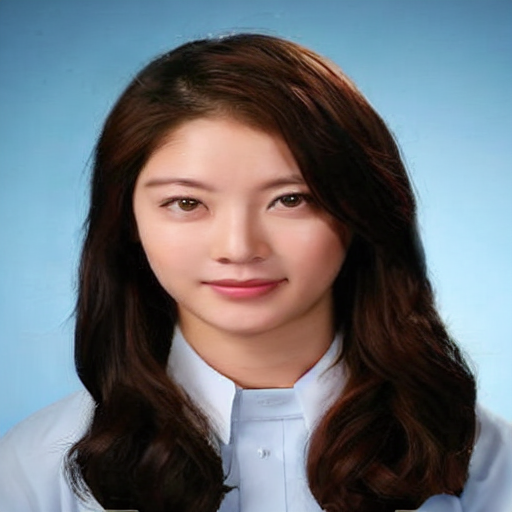

In [4]:
# !pip install diffusers transformers
# 원본 깃헙: https://github.com/Fantasy-Studio/Paint-by-Example
# 가이드: https://huggingface.co/docs/diffusers/v0.18.2/en/api/pipelines/paint_by_example#tips
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import load_image

# 원본 이미지
init_url = load_image(
    "C:\data\lapa\LaPa\\results\sample_gd5.jpg"
)
init_image = init_url.resize((512, 512))

# 마스크
mask_url = load_image(
    "C:\data\lapa\LaPa\\results\merged_sample_gd5.png"
)
mask_image = mask_url.resize((512, 512))

# 정장 사진
ex_url = load_image(
    "C:\data\lapa\LaPa\\results\suit4.jpg"
)
example_image = ex_url.resize((512, 512))

pipe = DiffusionPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
image